### House Price Prediction Model using Feature Engineering, Scaling, and Regression Models
To enhance prediction performance by optimizing features and evaluating different regression models on the California Housing dataset.

# Libraries Import

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Scikit-learn utilities
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Load

In [19]:
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("HousePrice")], axis=1)

In [20]:
# Display first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# Separating input features (X) and target variable (y)
X = df.drop("HousePrice", axis=1)
y = df["HousePrice"]

# Feature Scaling

In [22]:
# Scaling features to bring them to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [23]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nData split completed!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Data split completed!
Training samples: 16512
Testing samples: 4128


# Train Multiple Models

In [24]:
# Initializing regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42)
}

 # Model Evaluation & Comparison

In [25]:
# Dictionary to store results
results = []

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

# Creating comparison table
results_df = pd.DataFrame(results)
results_df

,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.533200,0.745581,0.575788
1,Ridge Regression,0.533193,0.745554,0.575819
2,Decision Tree,0.522259,0.724234,0.599732


In [26]:
# Selecting best model based on lowest RMSE
best_model_name = results_df.sort_values("RMSE").iloc[0]["Model"]
best_model_name

'Decision Tree'

In [27]:
# Re-training the best model for visualization
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Actual vs Predicted Plot

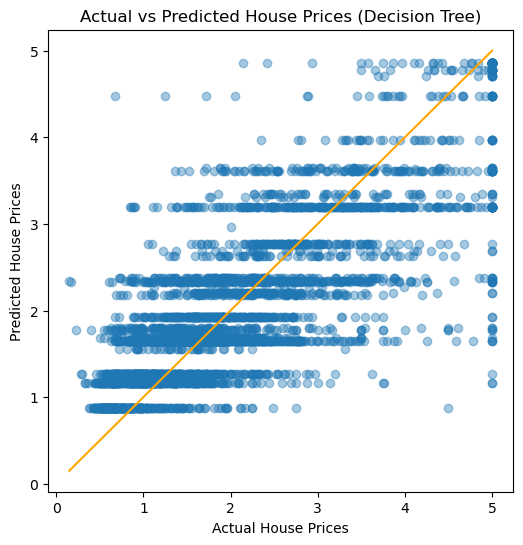

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title(f"Actual vs Predicted House Prices ({best_model_name})")

# Reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="orange")

plt.show()

# Conclusion 
Different regression models were applied to predict house prices and their results were compared.
The model showing lower error and better score performed more effectively on the dataset.
This task helped in understanding how model performance can vary on the same data.